In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import six

In [2]:
df_flange = pd.read_csv('data/elbow.csv')

In [3]:
df_flange_train = df_flange.query("T == 'training'").drop(columns=['T','No','30','40','50','60','70','80','90'])
df_flange_test = df_flange.query("T == 'test'").drop(columns=['T','No','30','40','50','60','70','80','90'])

In [4]:
df_flange_30 = df_flange.loc[0:29,'30']
df_flange_40 = df_flange.loc[0:29,'40']
df_flange_50 = df_flange.loc[0:29,'50']
df_flange_60 = df_flange.loc[0:29,'60']
df_flange_70 = df_flange.loc[0:29,'70']
df_flange_80 = df_flange.loc[0:29,'80']
df_flange_90 = df_flange.loc[0:29,'90']

In [5]:
df_flange_train.corr()

,L,B,D,T.1,DWT,SC,OP,GP,WP,CREW,WD,TLWT,Total_elbow
L,1.000000,0.800507,0.708220,0.787409,0.831970,0.759617,0.498982,0.251088,0.219355,0.437695,0.689074,0.522639,0.443368
B,0.800507,1.000000,0.921968,0.935546,0.960828,0.918393,0.707053,0.378457,0.460599,0.576606,0.860151,0.831618,0.647859
D,0.708220,0.921968,1.000000,0.959301,0.883952,0.899125,0.737340,0.446433,0.454727,0.519198,0.786949,0.863230,0.634190
T.1,0.787409,0.935546,0.959301,1.000000,0.935242,0.914190,0.740323,0.389185,0.502902,0.554862,0.816102,0.821027,0.611703
DWT,0.831970,0.960828,0.883952,0.935242,1.000000,0.931129,0.714035,0.252682,0.481123,0.489570,0.888393,0.767432,0.603597
SC,0.759617,0.918393,0.899125,0.914190,0.931129,1.000000,0.736439,0.326827,0.460806,0.428039,0.855559,0.821997,0.696297
OP,0.498982,0.707053,0.737340,0.740323,0.714035,0.736439,1.000000,0.588084,0.533555,0.512096,0.829256,0.837969,0.616536
GP,0.251088,0.378457,0.446433,0.389185,0.252682,0.326827,0.588084,1.000000,0.176115,0.408020,0.402254,0.561381,0.287790
WP,0.219355,0.460599,0.454727,0.502902,0.481123,0.460806,0.533555,0.176115,1.000000,0.407635,0.563393,0.526544,0.486467
CREW,0.437695,0.576606,0.519198,0.554862,0.489570,0.428039,0.512096,0.408020,0.407635,1.000000,0.482154,0.677164,0.402681


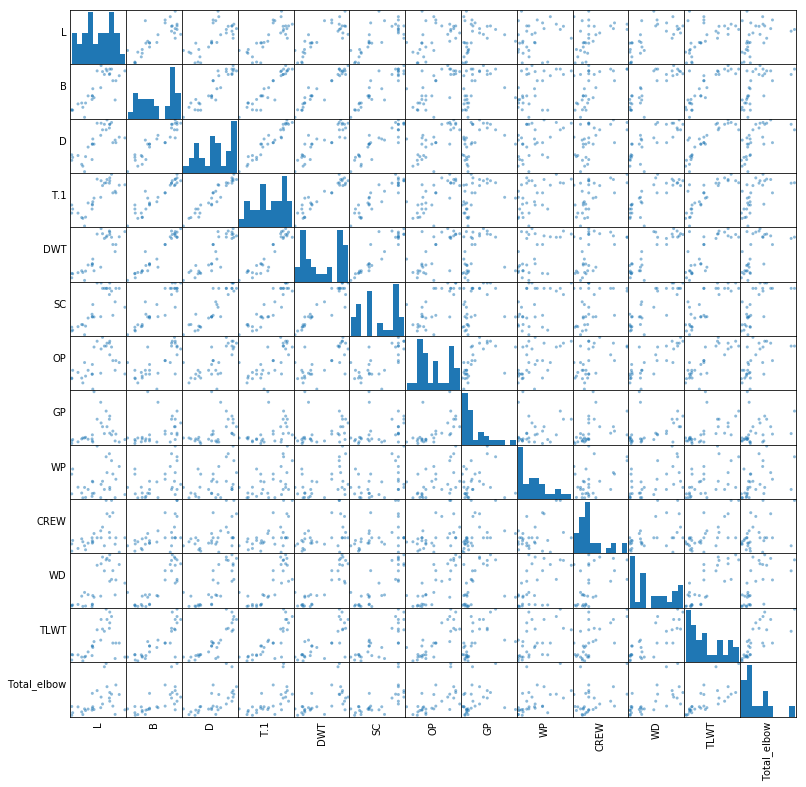

In [6]:
axs = pd.plotting.scatter_matrix(df_flange_train, figsize=(13,13))
n=len(df_flange_train.columns)
for i in range(n):
    v = axs[i,0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1,i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Linear Regression

In [7]:
linear_regressor_30 = LinearRegression()
linear_regressor_40 = LinearRegression()
linear_regressor_50 = LinearRegression()
linear_regressor_60 = LinearRegression()
linear_regressor_70 = LinearRegression()
linear_regressor_80 = LinearRegression()
linear_regressor_90 = LinearRegression()

In [8]:
linear_model_flange30 = linear_regressor_30.fit(df_flange_train,df_flange_30)
linear_model_flange40 = linear_regressor_40.fit(df_flange_train,df_flange_40)
linear_model_flange50 = linear_regressor_50.fit(df_flange_train,df_flange_50)
linear_model_flange60 = linear_regressor_60.fit(df_flange_train,df_flange_60)
linear_model_flange70 = linear_regressor_70.fit(df_flange_train,df_flange_70)
linear_model_flange80 = linear_regressor_80.fit(df_flange_train,df_flange_80)
linear_model_flange90 = linear_regressor_90.fit(df_flange_train,df_flange_90)

In [9]:
flange30_prediction_linear = linear_model_flange30.predict(df_flange_test)
flange40_prediction_linear = linear_model_flange40.predict(df_flange_test)
flange50_prediction_linear = linear_model_flange50.predict(df_flange_test)
flange60_prediction_linear = linear_model_flange60.predict(df_flange_test)
flange70_prediction_linear = linear_model_flange70.predict(df_flange_test)
flange80_prediction_linear = linear_model_flange80.predict(df_flange_test)
flange90_prediction_linear = linear_model_flange90.predict(df_flange_test)

In [10]:
print(flange30_prediction_linear)
print(flange40_prediction_linear)
print(flange50_prediction_linear)
print(flange60_prediction_linear)
print(flange70_prediction_linear)
print(flange80_prediction_linear)
print(flange90_prediction_linear)

[ 3.42742443  2.12251075 12.34894347]
[11.28688523 12.91689349 57.51296006]
[ 73.14045096  53.99721687 212.22044379]
[175.25071499  71.52986146 427.5003901 ]
[ 72.28512794  45.00679315 239.31488327]
[23.06885373 13.27754143 96.82375045]
[36.54054271  2.14918286 62.27862886]


# 2nd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [11]:
poly_2nd_30 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [12]:
poly_2nd_model_flange30 = poly_2nd_30.fit(df_flange_train,df_flange_30)
poly_2nd_model_flange40 = poly_2nd_40.fit(df_flange_train,df_flange_40)
poly_2nd_model_flange50 = poly_2nd_50.fit(df_flange_train,df_flange_50)
poly_2nd_model_flange60 = poly_2nd_60.fit(df_flange_train,df_flange_60)
poly_2nd_model_flange70 = poly_2nd_70.fit(df_flange_train,df_flange_70)
poly_2nd_model_flange80 = poly_2nd_80.fit(df_flange_train,df_flange_80)
poly_2nd_model_flange90 = poly_2nd_90.fit(df_flange_train,df_flange_90)

In [13]:
flange30_prediction_poly_2nd = poly_2nd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_2nd = poly_2nd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_2nd = poly_2nd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_2nd = poly_2nd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_2nd = poly_2nd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_2nd = poly_2nd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_2nd = poly_2nd_model_flange90.predict(df_flange_test)

In [14]:
print(flange30_prediction_poly_2nd)
print(flange40_prediction_poly_2nd)
print(flange50_prediction_poly_2nd)
print(flange60_prediction_poly_2nd)
print(flange70_prediction_poly_2nd)
print(flange80_prediction_poly_2nd)
print(flange90_prediction_poly_2nd) 

[ 6.41311335 -0.09493214 12.30542554]
[37.98873187  9.28622558 59.85408522]
[ 87.9107856   42.41091728 200.97880662]
[259.64321408  44.69604392 343.37796379]
[ 90.9451713   16.6390859  202.18779967]
[46.80399502 -2.36326415 85.78218649]
[43.9906613  17.24580706 21.90987914]


# 3rd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [15]:
poly_3rd_30 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [16]:
poly_3rd_model_flange30 = poly_3rd_30.fit(df_flange_train,df_flange_30)
poly_3rd_model_flange40 = poly_3rd_40.fit(df_flange_train,df_flange_40)
poly_3rd_model_flange50 = poly_3rd_50.fit(df_flange_train,df_flange_50)
poly_3rd_model_flange60 = poly_3rd_60.fit(df_flange_train,df_flange_60)
poly_3rd_model_flange70 = poly_3rd_70.fit(df_flange_train,df_flange_70)
poly_3rd_model_flange80 = poly_3rd_80.fit(df_flange_train,df_flange_80)
poly_3rd_model_flange90 = poly_3rd_90.fit(df_flange_train,df_flange_90)

In [17]:
flange30_prediction_poly_3rd = poly_3rd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_3rd = poly_3rd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_3rd = poly_3rd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_3rd = poly_3rd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_3rd = poly_3rd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_3rd = poly_3rd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_3rd = poly_3rd_model_flange90.predict(df_flange_test)

In [18]:
print(flange30_prediction_poly_3rd)
print(flange40_prediction_poly_3rd)
print(flange50_prediction_poly_3rd)
print(flange60_prediction_poly_3rd)
print(flange70_prediction_poly_3rd)
print(flange80_prediction_poly_3rd)
print(flange90_prediction_poly_3rd)

[ 9.10064125 -0.67049557 -4.53973645]
[1.47943445e+02 2.42099839e-04 9.47553665e+00]
[274.18909899 -32.15295077 -51.05925421]
[ 720.80581665 -132.11100051 -260.10554196]
[ 248.27560551 -116.59115413 -308.28695146]
[ 110.79810449  -50.24946219 -123.88524636]
[ 60.99854938  -7.20074356 -37.03775238]
